<a href="https://colab.research.google.com/github/burlharlin/sales-predictions/blob/main/project_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Import libraries

In [173]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import set_config
import matplotlib.pyplot as plt
import seaborn as sns
set_config(display='diagram')

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
filename = '/content/drive/MyDrive/Coding Dojo/02 Week 2: Pandas/sales_predictions.csv'

df = pd.read_csv(filename)
df_ml = df.copy()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploring the Data

In [176]:
df.info()
#1)Rows 8523; Columns 12
#2) See Dtype Below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [177]:
df.duplicated().sum()
#There were no duplicates

0

In [178]:
df.isna().sum()
#4) Missing Data---Item_Wieght:1463; Outlet:2410
# Data was removed for the exploring of the data. 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [179]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [180]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [181]:
df.groupby('Outlet_Size')['Item_Identifier'].count()
# Im going to remove both columns for now, but I will run another one for Outlet_size with 'missing' added


Outlet_Size
High       932
Medium    2793
Small     2388
Name: Item_Identifier, dtype: int64

In [182]:
df.groupby('Item_Fat_Content')['Item_Identifier'].count()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Identifier, dtype: int64

In [183]:
# Cleaning the Item_Fat_Content

df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat':'Low Fat','reg':'Regular'}, inplace = True)


In [184]:
df.groupby('Item_Fat_Content')['Item_Identifier'].count()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Identifier, dtype: int64

# Working on Visualizations

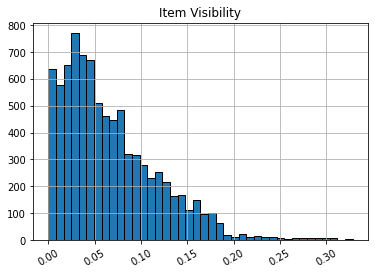

In [185]:
df['Item_Visibility'].hist(bins = 40, edgecolor= 'black')
plt.xticks(rotation = 30);
plt.title("Item Visibility");

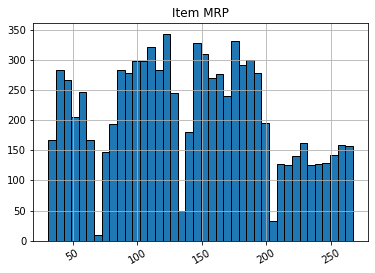

In [186]:
df['Item_MRP'].hist(bins = 40, edgecolor= 'black')
plt.xticks(rotation = 30);
plt.title("Item MRP");

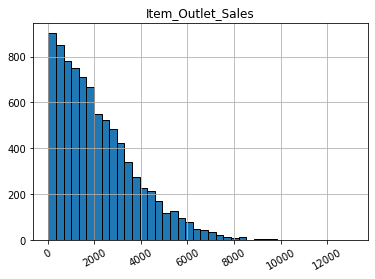

In [187]:
df['Item_Outlet_Sales'].hist(bins = 40, edgecolor= 'black')
plt.xticks(rotation = 30);
plt.title('Item_Outlet_Sales');

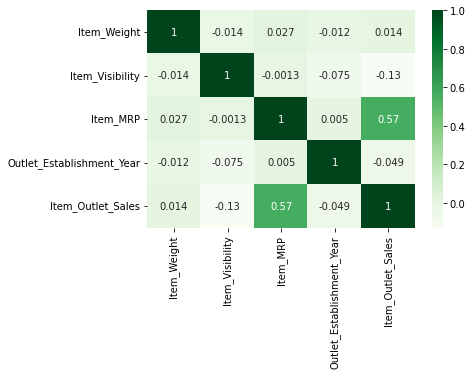

In [188]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot= True);

In [189]:
Outlet_Count = df['Outlet_Type'].value_counts()
Outlet_Count

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

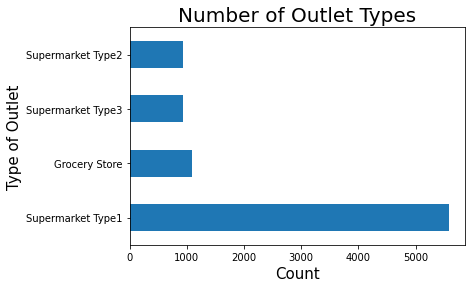

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [190]:
Outlet_Count.plot(kind = 'barh')
plt.title('Number of Outlet Types', fontsize = 20)
plt.ylabel('Type of Outlet',fontsize = 15)
plt.xlabel('Count',fontsize = 15)
plt.show()
Outlet_Count

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


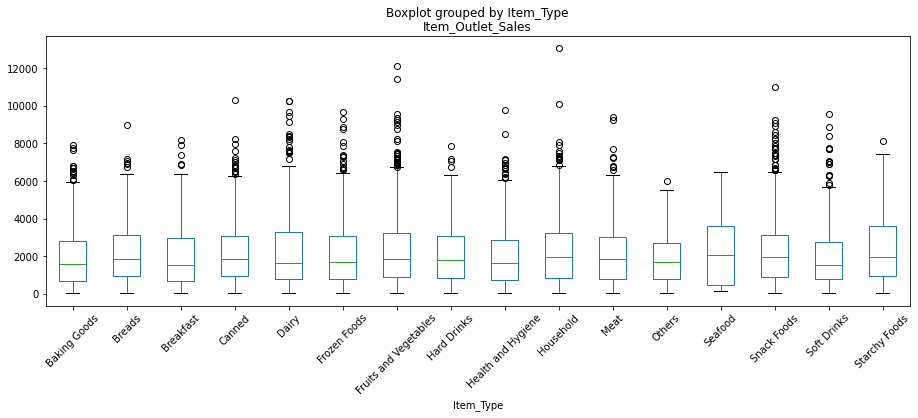

In [191]:
df.boxplot('Item_Outlet_Sales',
  by = 'Item_Type',
  figsize = (15,5),
  rot = 45,
  grid=False
)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


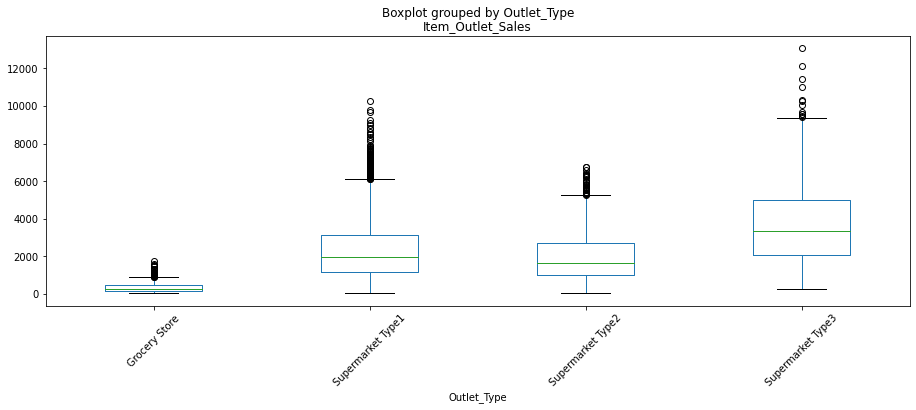

In [192]:
df.boxplot('Item_Outlet_Sales',
  by = 'Outlet_Type',
  figsize = (15,5),
  rot = 45,
  grid=False
)

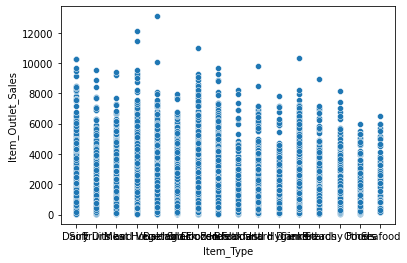

In [193]:
sns.scatterplot(data = df, x = 'Item_Type', y = 'Item_Outlet_Sales' )


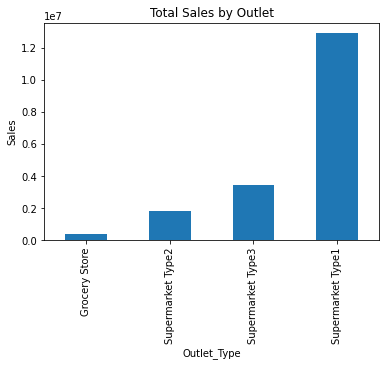

In [194]:
Total_Sales_by_Outlets_Types = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values()
Total_Sales_by_Outlets_Types.plot(kind='bar')
plt.title('Total Sales by Outlet')
plt.ylabel('Sales');

# Cleaning data before Machine Learning using the copied dataframe


In [195]:
df_ml.duplicated().sum()
#There are no duplicates

0

In [196]:
df_ml.groupby('Item_Fat_Content')['Item_Identifier'].count()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Identifier, dtype: int64

In [197]:
df_ml['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat':'Low Fat','reg':'Regular'}, inplace = True)

In [198]:
df_ml.groupby('Item_Fat_Content')['Item_Identifier'].count()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Identifier, dtype: int64

### I went ahead and transformed the Item Fat Contect since it is ordinal data (Low fat: 0, Regular : 1) 

In [199]:
replacement_dictionary = {'Low Fat':0,'Regular':1 }
df_ml['Item_Fat_Content'].replace(replacement_dictionary, inplace = True)
df_ml['Item_Fat_Content']

0       0
1       1
2       0
3       1
4       0
       ..
8518    0
8519    1
8520    0
8521    1
8522    0
Name: Item_Fat_Content, Length: 8523, dtype: int64

# Cleaning is complete, but there are columns that need to be dropped before we split the data. 

# Date split and making pipeline

In [200]:
# split into features and target
# Droping 'Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year' due to the uniqueness. This should allow the ML to perform better.
df_ml.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],inplace = True)

X = df_ml.drop(columns=['Item_Outlet_Sales'])

y= df_ml['Item_Outlet_Sales']


X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [201]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [202]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
most_frequent_imputer = SimpleImputer(strategy='most_frequent')

In [203]:
num_pipe = make_pipeline(mean_imputer,scaler)
num_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [204]:
cat_pipe = make_pipeline(most_frequent_imputer,ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [205]:
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [206]:
preprocessor = make_column_transformer(num_tuple,cat_tuple, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4a5afd5a90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4a5afd5f10>)])

# Pipeline is complete and ready to use

In [207]:
# Created a function to take the true and predicted labels and print MAE, MSE, RMSE, and R2 metrics
def evaluate_regression(y_true, y_pred):
  """Takes true target and predicted target and prints , RMSE and R2"""
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'scores: \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

# Linear Regression 

In [208]:
lin_reg = LinearRegression()
lin_reg_pipe = make_pipeline(preprocessor,lin_reg)
lin_reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4a5afd5a90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4a5afd5f10>)])),
                ('linearregression', LinearRegression())])

In [209]:
print('Train Data')
evaluate_regression(y_train, lin_reg_pipe.predict(X_train))
print('\nTest Data')
evaluate_regression(y_test, lin_reg_pipe.predict(X_test))

Train Data
scores: 
RMSE: 1,140.32 
R2: 0.56

Test Data
scores: 
RMSE: 1,094.76 
R2: 0.57


# Decision Tree Regressor

In [210]:
dec_tree = DecisionTreeRegressor(max_depth=None)
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4a5afd5a90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4a5afd5f10>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [211]:
print('Train Data')
evaluate_regression(y_train, dec_tree_pipe.predict(X_train))
print('\nTest Data')
evaluate_regression(y_test, dec_tree_pipe.predict(X_test))

Train Data
scores: 
RMSE: 0.00 
R2: 1.00

Test Data
scores: 
RMSE: 1,553.86 
R2: 0.12


In [212]:
dec_tree.get_depth()

42

In [213]:
depths = range (1,42)
scores = pd.DataFrame(columns=['Train','Test'],index=depths)
for depth in depths:
  dec = DecisionTreeRegressor(max_depth=depth)
  dec_pipe = make_pipeline(preprocessor,dec)
  dec_pipe.fit(X_train,y_train)
  train_pred = dec_pipe.predict(X_train)
  test_pred = dec_pipe.predict(X_test)
  train_r2 = r2_score(y_train, train_pred)
  test_r2 = r2_score(y_test, test_pred)
  scores.loc[depth,'Train'] = train_r2
  scores.loc[depth,'Test'] = test_r2


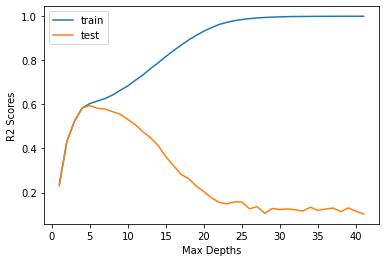

In [214]:
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [215]:
scores.sort_values(by='Test', ascending=False,).head(2)

,Train,Test
5,0.60394,0.59471
4,0.582625,0.584005


In [216]:
dec_tree_5 = DecisionTreeRegressor(max_depth=5)
dec_tree_pipe_5 = make_pipeline(preprocessor, dec_tree_5)
dec_tree_pipe_5.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4a5afd5a90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4a5afd5f10>)])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=5))])

In [217]:
print('Train Data')
evaluate_regression(y_train, dec_tree_pipe_5.predict(X_train))
print('\nTest Data')
evaluate_regression(y_test, dec_tree_pipe_5.predict(X_test))

Train Data
scores: 
RMSE: 1,082.65 
R2: 0.60

Test Data
scores: 
RMSE: 1,057.44 
R2: 0.59


#Comparing Models based on RMSE and r^2




Decision Tree

In [218]:
print(' Dec Tree Train Data')
evaluate_regression(y_train, dec_tree_pipe_5.predict(X_train)),

print('\n Dec Tree Test Data')
evaluate_regression(y_test, dec_tree_pipe_5.predict(X_test));



 Dec Tree Train Data
scores: 
RMSE: 1,082.65 
R2: 0.60

 Dec Tree Test Data
scores: 
RMSE: 1,057.44 
R2: 0.59


Linear Regression

In [219]:
print('Regression Train Data')
evaluate_regression(y_train, lin_reg_pipe.predict(X_train))

print('\n Regression Test Data')
evaluate_regression(y_test, lin_reg_pipe.predict(X_test))

Regression Train Data
scores: 
RMSE: 1,140.32 
R2: 0.56

 Regression Test Data
scores: 
RMSE: 1,094.76 
R2: 0.57


### From these two model, the best fit is the Linear Regression because the RMSE is 1057.44 compated to 1091.76 for the Decision Tree on the test data. Despite the r^2 is slightly better for the Decison Tree we can decreae the overall erroe by using Kiner Regression. 